# Exercise 1 - Exploratory Data Analysis



1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.


## Introducing The Data

### Brief Data Summary

For this particular exploratory data analysis, I have chosen a the Fandango Score Comparison data compiled by FiveThirtyEight. The __[dataset](https://github.com/fivethirtyeight/data/tree/master/fandango)__ was pulled from FiveThirtyEight's public GitHub repository, with the following description: 
<br> 
<br> 
*'[The data] contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.'* 
<br> 
<br> 
I am particularly interested in this specific set as it compares multiple online review sites. As studied in previous projects, such as a __[statistical analysis done in R](https://github.com/avanigupta1/Box-Office-Predictions)__, I am intrigued by the personas that different online review sources take, and how their reviews impact both public opinion and box office profits.
<br> 

### Focus of Analysis & Data Dictionary

In this analysis, I will be focusing solely on the comparison between the review sites. The data aggregates the scores from 4 different review sources for 145 films. It provides both the publication's score and user score for multiple sources, along with normalized score for each metric to more easily evaluate and compare. For this analysis, I will be using only the normalized scores of the following metrics:
1. **RT_norm**: The Rotten Tomatoes Tomatometer score for the film
2. **RT_user_norm**: The Rotten Tomatoes user score for the film
3. **Metacritic_norm**: The Metacritic critic score for the film
4. **Metacritic_user_norm**: The Metacritic user score for the film
5. **IMDB_norm**: The IMDb user score for the film
6. **Fandango_Stars**: The number of stars the film had on its Fandango movie page
7. **Fandango_Ratingvalue**: The Fandango ratingValue for the film

Additionally, I have created a new variable 'Year' that indicates the year of the film's release. 

### Data Import

In [1]:
import pandas as pd

# Import and read-in data
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

# Convert to dataframe, reset and rename index
ReviewComp = pd.DataFrame(df)
ReviewComp = ReviewComp.reset_index()
ReviewComp = ReviewComp.rename(columns={ ReviewComp.columns[0]: "Film" })

# Create new variable - year
ReviewComp['Year'] = ReviewComp['Film'].str.slice(-6)

# Drop unwanted variables
ReviewComp = ReviewComp.drop(columns=['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB'])
ReviewComp = ReviewComp.drop(columns=['RT_norm_round', 'RT_user_norm_round', 'Metacritic_norm_round', 'Metacritic_user_norm_round', 'IMDB_norm_round'])
ReviewComp = ReviewComp.drop(columns=['Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes', 'Fandango_Difference'])

# Showcase data sample
ReviewComp.head()

,Film,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,3.70,4.3,3.30,3.55,3.90,(2015)
1,Cinderella (2015),5.0,4.5,4.25,4.0,3.35,3.75,3.55,(2015)
2,Ant-Man (2015),5.0,4.5,4.00,4.5,3.20,4.05,3.90,(2015)
3,Do You Believe? (2015),5.0,4.5,0.90,4.2,1.10,2.35,2.70,(2015)
4,Hot Tub Time Machine 2 (2015),3.5,3.0,0.70,1.4,1.45,1.70,2.55,(2015)


### Initial Data Exploration

For the initial data exploration, let's see if there are any clear differences in the distributions between the different rating sources.

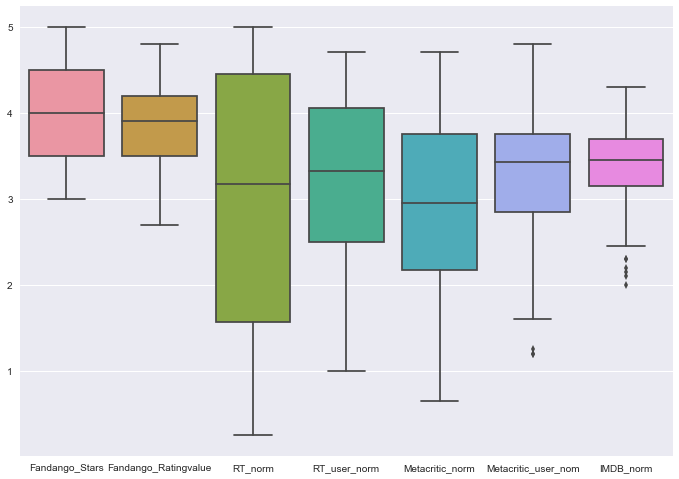

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Plot basic boxplot of the 7 metrics
sns.set(rc={'figure.figsize':(11.7,8.27)})
basicboxplot = sns.boxplot(data=ReviewComp)

In the above plot, we an clearly see that Rotten Tomatoes Tomatometer score has the largest distribution, with IMDB having the smallest. The data also shows that Fandango Stars has the seemingly highest average ratings, while Metacritic has the lowest. 
<br>
<br>
In looking for patterns between different ratings sources, we can easily compare all by creating a pairwise plot and looking for any outliers in the plots. 

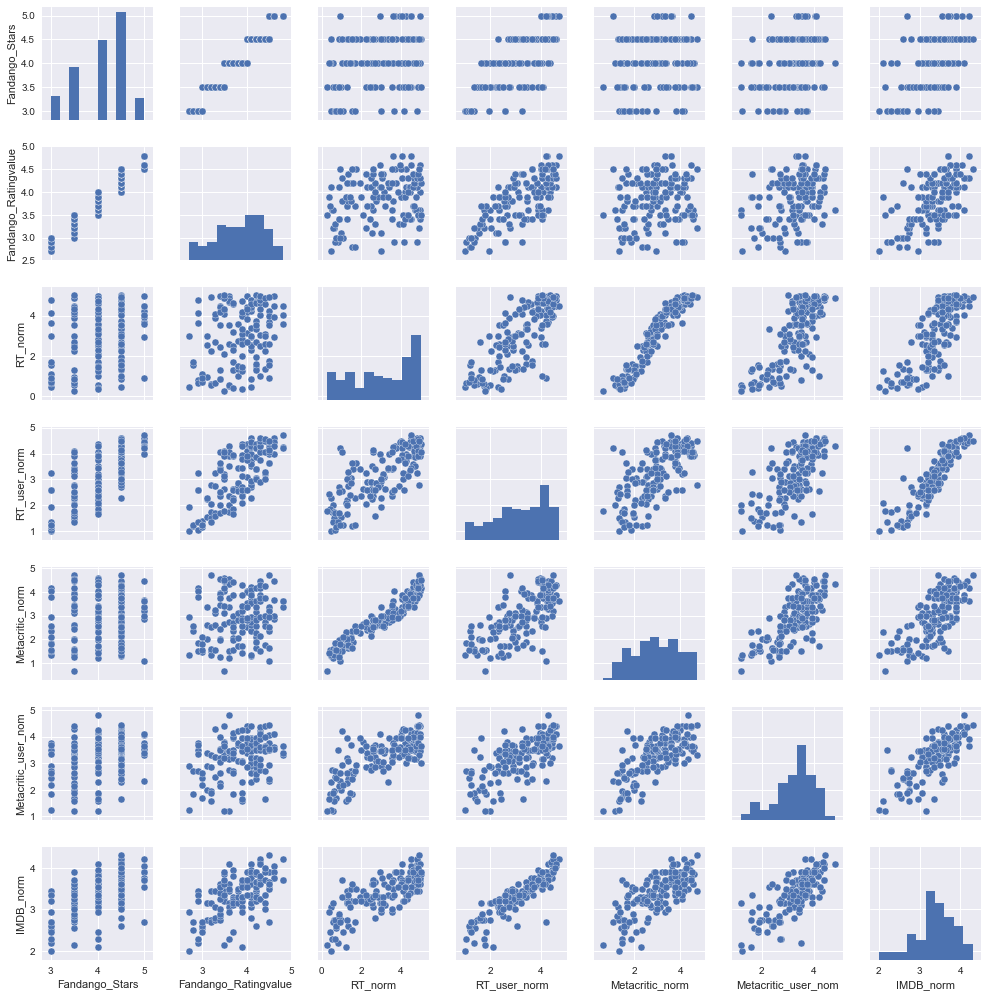

In [3]:
%matplotlib inline

# Create pairwise plot of all 7 rating metrics
sns.pairplot(ReviewComp, size=2)

We can view these relationships more specifically with a correlation matrix, as seen below.  
<br>

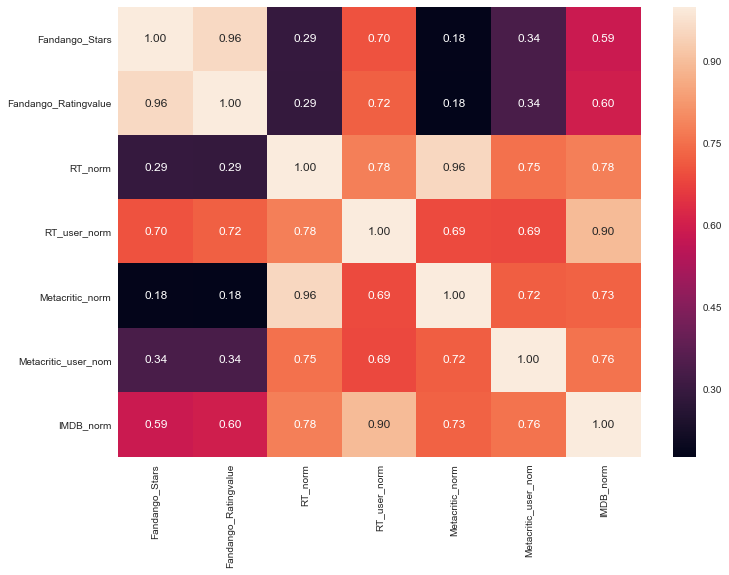

In [4]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create correlation matrix of 7 ratings metrics
sns.heatmap(ReviewComp.corr(), annot=True, fmt=".2f")
plt.show()

#### Initial Data Takeaways

Both the pairwise plots and correlation matrix show mostly linear relationships between the ratings. 
However, there are two interesting things to note:
1. The Fandango Stars and Fandango Rating Value are mostly in line with one another, but seem to be anomalous with other sources.
    - Due to their similarities, we will only focus on one Fandango metric moving forward, the Fandango Rating Value. 
2. Rotten Tomatoes Tomatometer score seems to have a larger spread than other scores.  
<br>

Now that we have a few paths to focus on, we can proceed to analyzing certain behaviors in the data, namely:
- The discrepancies within the Rotten Tomato and Fandango ratings
- The distinct personas of each rating system when compared with each other overall
- The changes between years in regards to overall ratings

We can look further into these metric variances by creating an average rating per movie, and plotting where each of the two rating sources lands above or below. 

### Focused Analysis

#### 1. Seeming Discrepancies Amongst Both Rotten Tomatoes and Fandango

As seen in the pairwise plots and correlation matrix, the values for Fandango Rating Value and Rotten Tomatoes Tomatometer score differentiated quite substantially from the seemingly in-line ratings from other sources.

We can look further into these metric variances by creating an average rating per movie, and plotting where each of the two rating sources lands above or below. 

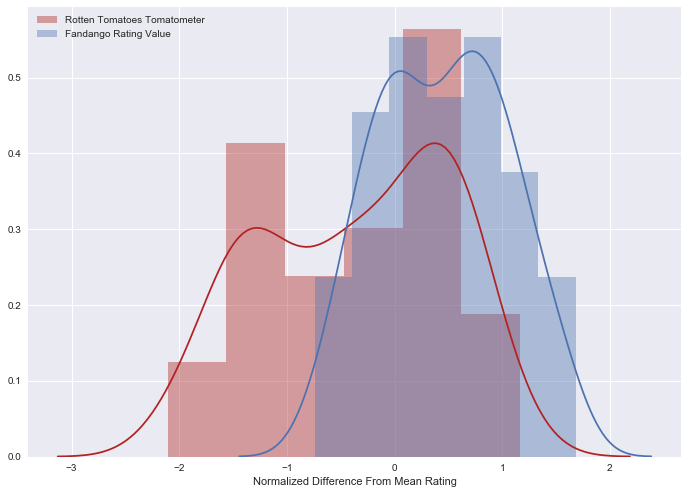

In [5]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Create average rating column
ReviewComp['AverageRating'] = ReviewComp.iloc[:,1:7].mean(axis=1)

# Create difference variables
ReviewComp['FRVDifference'] = ReviewComp['Fandango_Ratingvalue']-ReviewComp['AverageRating']
ReviewComp['RTDifference'] = ReviewComp['RT_norm']-ReviewComp['AverageRating']

# Create plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(ReviewComp.RTDifference, color = "firebrick", label = 'Rotten Tomatoes Tomatometer' )
sns.distplot(ReviewComp.FRVDifference, label = 'Fandango Rating Value')
plt.xlabel("Normalized Difference From Mean Rating")
plt.legend()
plt.show()

The above plot certainly seems to suggest that:
- Fandango Rating Value ratings are inflated in comparison to the majority of viewers and critics, as the majority of its distribution lies above the mean rating.
- While the Rotten Tomato Tomatometer does not skew as heavily, there does seem to be a slight decrease in its ratings compared to the average rating. 
<br>

We can look further into this by comparing all 7 metrics' distributions, along with their normalized difference from mean distributions. 

#### 2. Overall Rating Source Distributions

To begin, we can create density plots for each rating source and compare their overall distributions. 

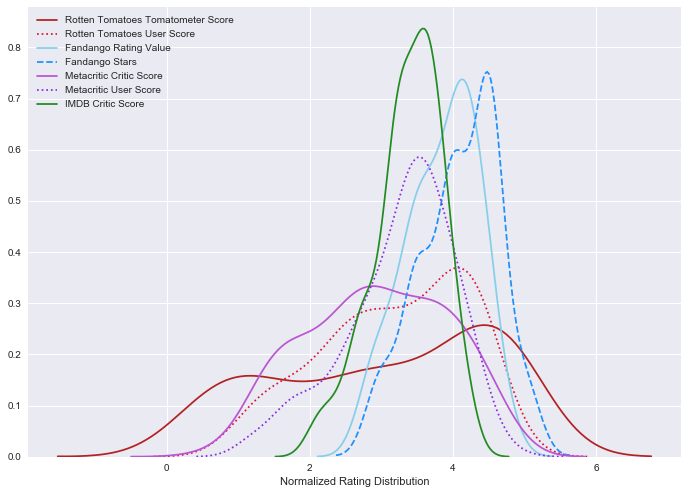

In [6]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Create plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(ReviewComp.RT_norm, hist=False, kde=True,kde_kws={"color": "firebrick"},label = 'Rotten Tomatoes Tomatometer Score')
sns.distplot(ReviewComp.RT_user_norm, hist=False, kde=True, kde_kws={"linestyle":":","color": "crimson"}, label = 'Rotten Tomatoes User Score')
sns.distplot(ReviewComp.Fandango_Ratingvalue, hist=False, kde=True,kde_kws={"color": "skyblue"},label = 'Fandango Rating Value')
sns.distplot(ReviewComp.Fandango_Stars, hist=False, kde=True, kde_kws={"linestyle":"--","color": "dodgerblue"}, label = 'Fandango Stars')
sns.distplot(ReviewComp.Metacritic_norm, hist=False, kde=True,kde_kws={"color": "mediumorchid"},label = 'Metacritic Critic Score')
sns.distplot(ReviewComp.Metacritic_user_nom, hist=False, kde=True,kde_kws={"linestyle":":","color": "blueviolet"},label = 'Metacritic User Score')
sns.distplot(ReviewComp.IMDB_norm, hist=False, kde=True,kde_kws={"color": "forestgreen"},label = 'IMDB Critic Score')

plt.xlabel("Normalized Rating Distribution")
plt.legend()
plt.show()

The distributions seem fairly in line with what was shown in the overall boxplots. 

We can next take a closer look and compare the distributions of each rating service's difference from the average rating.

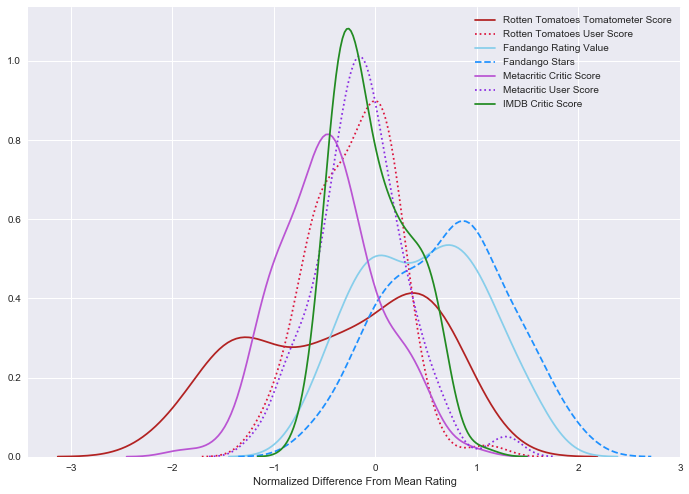

In [7]:
warnings.filterwarnings('ignore')
%matplotlib inline

# Create difference variables
ReviewComp['FSDifference'] = ReviewComp['Fandango_Stars']-ReviewComp['AverageRating']
ReviewComp['RTuDifference'] = ReviewComp['RT_user_norm']-ReviewComp['AverageRating']
ReviewComp['MCDifference'] = ReviewComp['Metacritic_norm']-ReviewComp['AverageRating']
ReviewComp['MCuDifference'] = ReviewComp['Metacritic_user_nom']-ReviewComp['AverageRating']
ReviewComp['IMDBDifference'] = ReviewComp['IMDB_norm']-ReviewComp['AverageRating']

# Create plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(ReviewComp.RTDifference, hist=False, kde=True,kde_kws={"color": "firebrick"},label = 'Rotten Tomatoes Tomatometer Score' )
sns.distplot(ReviewComp.RTuDifference, hist=False, kde=True, kde_kws={"linestyle":":","color": "crimson"}, label = 'Rotten Tomatoes User Score')
sns.distplot(ReviewComp.FRVDifference, hist=False, kde=True, kde_kws={"color": "skyblue"},label = 'Fandango Rating Value')
sns.distplot(ReviewComp.FSDifference, hist=False, kde=True, kde_kws={"linestyle":"--","color": "dodgerblue"},label = 'Fandango Stars')
sns.distplot(ReviewComp.MCDifference,  hist=False, kde=True,kde_kws={"color": "mediumorchid"},label = 'Metacritic Critic Score')
sns.distplot(ReviewComp.MCuDifference, hist=False, kde=True,kde_kws={"linestyle":":","color": "blueviolet"},label = 'Metacritic User Score')
sns.distplot(ReviewComp.IMDBDifference,hist=False, kde=True,kde_kws={"color": "forestgreen"},label = 'IMDB Critic Score')
plt.xlabel("Normalized Difference From Mean Rating")
plt.legend()
plt.show()

We can deduce the following from the above plot:
- Fandango ratings seem clearly higher than all others
- IMDB ratings are most in line with the average ratings of the film
- The Rotten Tomatoes Tomatometer scores have the largest distribution, and skew slightly negative. Though this is in line with the plots comparing just Rotten Tomatoes and Fandango, there seems to be a better spread than previously indicated. 
- Metacritic Critic scores seem to have the lowest average ratings

#### 3. Measuring Year-Specific Ratings

To first look into the changes in ratings over years, we can look at a frequency table of how many values are included in each. 

In [8]:
# Create frequency table to view count of films per year
ReviewComp.groupby('Year').count().iloc[0:2,0:1]

,Film
Year,
(2014),17
(2015),129


As we can see, there are only two years present in the data, and number of the values within 2015 are much greater than that of 2014. While this is clearly imbalanced, we can proceed by creating two groups and plotting their distributions separately. 

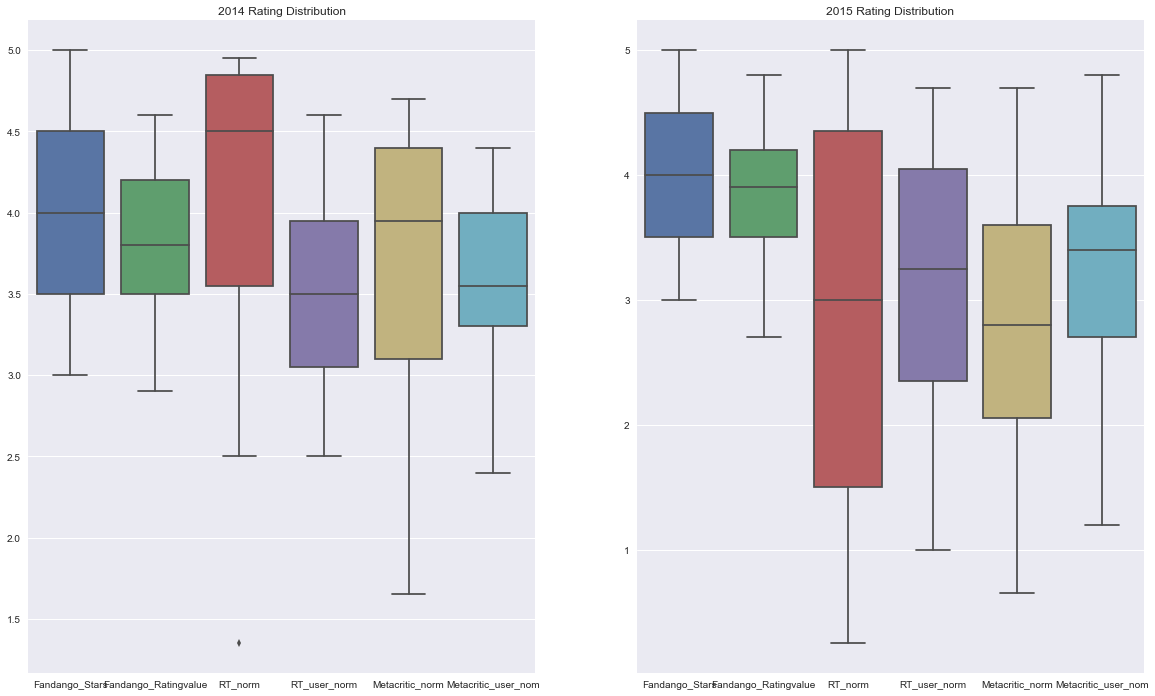

In [9]:
# Create groupby group 
Years = ReviewComp.groupby('Year')

# Seperate groups into new dataframes
Year2015 = pd.DataFrame(Years.get_group('(2015)'))
Year2014 = pd.DataFrame(Years.get_group('(2014)'))

# Include only ratings and remove difference from mean
Year2015Ratings = Year2015.iloc[:,1:7]
Year2014Ratings = Year2014.iloc[:,1:7]


# Plot boxplots for each year
f = plt.figure(figsize=(20,12))
f.add_subplot(1,2, 1)
sns.boxplot(data=Year2014Ratings)
plt.title('2014 Rating Distribution')
f.add_subplot(1,2, 2)
sns.boxplot(data=Year2015Ratings)
plt.title('2015 Rating Distribution')
plt.show(block=True)

We can make out the following from the above year-specific plots:
- The range of ratings is overall lower for 2015, as can be seen by the y-axis
- Fandango Star and Rating Value rating distributions are approximately the same
- The Rotten Tomatoes Tomatometer rating is much larger in 2015, with a higher peak and much lower valley
- The Rotten Tomatoes User rating follows a similar pattern to the Tomatometer rating, with a slightly smaller spread
- The Metacritic Critic score follows a similar pattern as those of Rotten Tomatoes, as does the Metacritic User score

We can next take a look at overall average ratings for the two years, and how they compare:

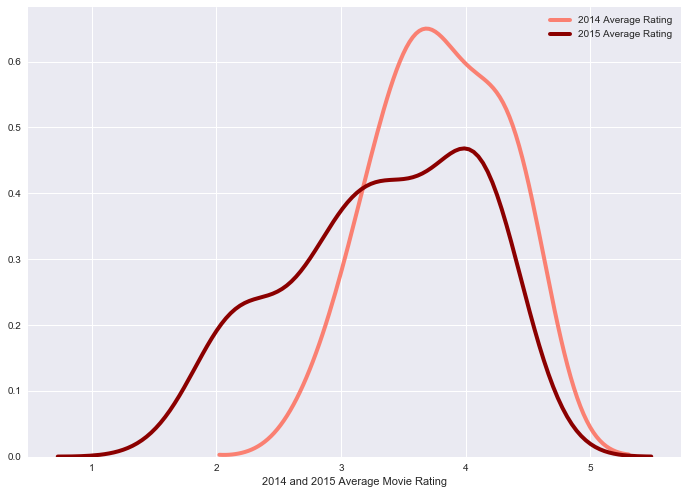

In [10]:
warnings.filterwarnings('ignore')
%matplotlib inline

# Create plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Year2014.AverageRating, hist=False, kde=True, kde_kws={'linewidth': 4,"color": "salmon" } ,label = '2014 Average Rating')
sns.distplot(Year2015.AverageRating, hist=False, kde=True,kde_kws={'linewidth': 4,"color": "darkred" },label = '2015 Average Rating')

# Plot averages
plt.xlabel("2014 and 2015 Average Movie Rating")
plt.legend()
plt.show()

The compared distributions seem to indicate an overall higher movie rating for 2014 films than 2015 films. However, this could be due to the very unbalanced data, and does not take into account other factors that impact both critical and user scores. 

## Final Takeaways & Further Research

### Takeaways

From the above three sections of analysis, we can deduce the following takeaways, with the stipulation that there are quite a few limitations to both the data and the analysis:

- Fandango movie ratings seem to be higher overall then their competitors and the average movie ratings
- Rotten Tomatoes movie ratings, specifically the Tomatometer ratings, have the largest overall distribution of ratings
- The remaining rating sources seem to be in-line with each other, with Metacritic Critical ratings having the overall lowest ratings on average
- Films seemed to be more positively reviewed in 2014 than in 2015

In regards to the veracity of each rating source, it is difficult to make a claim due to objectivity. One could deduce that Fandango ratings over-rate films while Rotten Tomatoes is the most fair and accurate, but there would need to be much further analysis to substantiate these claims. 



### Limitations

As this is a brief data exploration, there are quite a few limitations inherent within the dataset and regarding data context that limit us from making any analytical claims about ratings. Some are as follows:
- There are only datapoints from 2014 and 2015
- There is a large discrepancy between the number of points available between the years
- The total sample set is quite small
- There is no indication of when in a movie's rollout these scores were noted down
- There is no outside context as to the differences between the score aggregation methodology, nor the differences between the different ratings within a single source

### Further Research

Based on the above limitations, it would be prudent to gather the following information to allow us to delve further into the study of the different rating agent's personas:
- Gather datapoints from source of films from 2015-2019
- Include statistics about each film such as genre, star power, etc.
- Research the aggregation methodology and 'voting' bodies for each source
- Include a feature that notes how long these scores have been aggregated over 